# Stock Price Prediction

- <a href='#1'>1. Importing Modules</a>
- <a href='#2'>2. Data</a>
- <a href='#3'>3. Exploratory Data Analysis</a>
    - <a href='#3.1'>3.1. Exploratory Report in data</a>
    - <a href='#3.2'>3.2. Time Series Visualization of Mid Prices</a>
- <a href='#4'>4. Data preprocessing</a>
    - <a href='#4.1'>4.1. Splitting Data into a Training set and a Test set</a>

- <a href='#5'>5. Model Building</a>
   

# <a id='1'>1.Importing Modules</a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
#import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import pandas_profiling as pf
#import utils

# <a id='2'>2.Data</a>

In [2]:
df = pd.read_csv("apple.csv")

# <a id='3'>3.Data Exploration</a>

In [3]:
df.head()

,date,date.1,open,high,low,close,volume,Name
0,2013-02-08,2013-02-08,13.62,13.780,13.32,13.59,5875887,GT
1,2013-02-11,2013-02-11,13.70,13.930,13.53,13.91,7967771,GT
2,2013-02-12,2013-02-12,13.55,14.150,13.10,13.86,12293423,GT
3,2013-02-13,2013-02-13,13.90,14.175,13.90,14.08,7092499,GT
4,2013-02-14,2013-02-14,14.00,14.200,13.93,14.17,4514455,GT


In [4]:
print(df.shape)
df.describe()

(1259, 8)


,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,27.449035,27.783992,27.123672,27.460191,3.599275e+06
std,5.893554,5.930431,5.857553,5.893358,1.932297e+06
min,11.990000,12.160000,11.830000,11.950000,8.470200e+05
25%,24.825000,25.060000,24.500000,24.780000,2.428246e+06
50%,28.250000,28.630000,27.820000,28.200000,3.149127e+06
75%,31.910000,32.287500,31.565000,31.915000,4.174751e+06
max,36.980000,37.200000,36.680000,36.880000,1.899053e+07


## <a id='3.1'>3.1. Exploratory Report in data</a>

In [5]:
#pf.ProfileReport(df)

## <a id='3.2'>3.2. Time Series Visualization of Mid Prices</a>

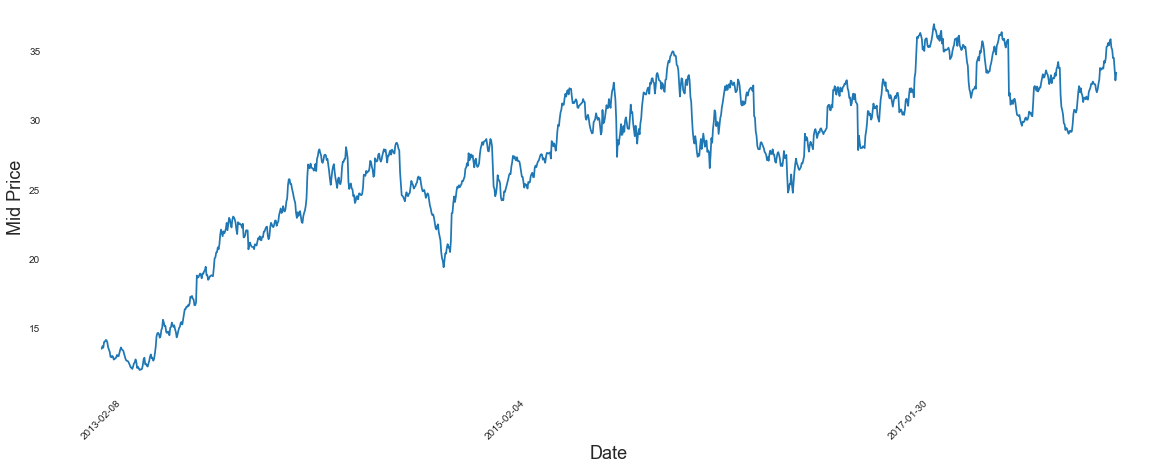

<Figure size 1440x936 with 0 Axes>

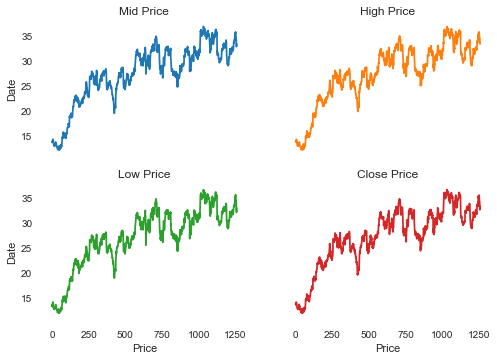

In [8]:
df['mid'] = (df['low'] + df["high"])/2.0
plt.figure(figsize = (20,7))
plt.plot(range(df.shape[0]), df["mid"])
plt.xticks(range(0, df.shape[0], 500), df["date"].loc[::500], rotation = 45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()


plt.figure(figsize = (20,13))
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(range(df.shape[0]), df["mid"])
axs[0, 0].set_title('Mid Price')
axs[0, 1].plot(range(df.shape[0]), df["high"], 'tab:orange')
axs[0, 1].set_title('High Price')
axs[1, 0].plot(range(df.shape[0]), df["low"], 'tab:green')
axs[1, 0].set_title('Low Price')
axs[1, 1].plot(range(df.shape[0]), df["close"], 'tab:red')
axs[1, 1].set_title('Close Price')

for ax in axs.flat:
    ax.set(xlabel='Price', ylabel='Date')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [9]:
import plotly.graph_objects as go

trace = {
    'x': df.index,
    'y': df.Close,
    'type': 'scatter',
    'showlegend': True,
    "name": "Close"
}

trace2 = {
    'x': df.index,
    'y': df.High,
    'type': 'scatter',
    'showlegend': True,
    "name": "High"
}

trace3 = {
    'x': df.index,
    'y': df.Low,
    'type': 'scatter',
    'showlegend': True,
    "name": "Low"
}

trace4 = {
    'x': df.index,
    'y': df.mid,
    'type': 'scatter',
    'showlegend': True,
    "name": "mid"
}


data = [trace, trace2, trace3, trace4
       ]
layout = go.Layout({
    'title': {
        'text': 'Time Series Distribution for all stock prices',
        'font': {
            'size': 15
        }
    }
})

fig = go.Figure(data = data, layout = layout)
fig.write_html("candle.html")
fig.show()

AttributeError: 'DataFrame' object has no attribute 'Close'

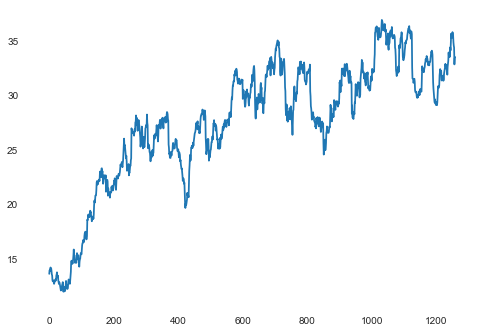

In [10]:
# instantiate our scaler class
scaler = MinMaxScaler(feature_range = (0, 1))

# set our target variable to the closing price
plt.plot(df["close"], label = "Close")

In [12]:
# Linear Regression Implementation
df["date"] = pd.to_datetime(df.date, format = '%Y-%m-%d')
df.index = df['date']

data = df.sort_index(ascending = True, axis = 0)

# let create a new dataset 
df_new = pd.DataFrame(index = range(0, len(df)), columns = ["date", "close"])

for i in range(0, len(df)):
    df_new["date"][i] = data['date'][i]
    df_new["close"][i] = data["close"][i]
    
from fastai.tabular import add_datepart
add_datepart(df_new, "date")
df_new.columns
df_new.drop("Elapsed", axis = 1, inplace = True)

In [14]:
df_new.head()

,close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,monday_friday
0,13.59,2013,2,6,8,4,39,False,False,False,False,False,False,1
1,13.91,2013,2,7,11,0,42,False,False,False,False,False,False,1
2,13.86,2013,2,7,12,1,43,False,False,False,False,False,False,0
3,14.08,2013,2,7,13,2,44,False,False,False,False,False,False,0
4,14.17,2013,2,7,14,3,45,False,False,False,False,False,False,0


In [13]:
from sklearn.metrics import mean_squared_error

df_new['monday_friday'] = 0
for i in range(0, len(df_new)):
    if (df_new["Dayofweek"][i] == 0 or df_new["Dayofweek"][i] == 4):
        df_new["monday_friday"][i] = 1
    else:
        df_new["monday_friday"][i] = 0

        

train = df_new[:11000]
validation = df_new[11000:]

X_train = train.drop("close", axis = 1)
y_train = train["close"]

X_validation = validation.drop('close', axis=1)
y_validation = validation['close']

# Linear Regression implementation
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


pred = lr_model.predict(X_validation)
root_mean_squared_err = np.sqrt(mean_squared_error(y_validation, pred))

C:\Users\ajayi\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ajayi\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


ValueError: Found array with 0 sample(s) (shape=(0, 13)) while a minimum of 1 is required.

In [61]:
root_mean_squared_err

3.0522383151366608

C:\Users\ajayi\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ajayi\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



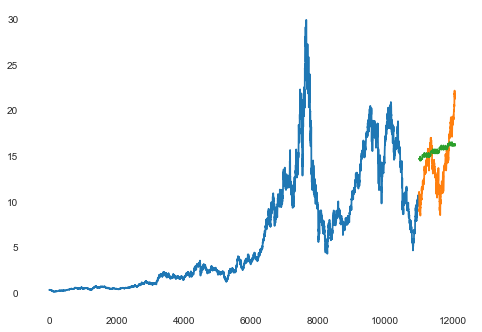

In [37]:
validation["Predictions"] = 0
validation["Predictions"] = pred
validation.index = df_new[11000:].index
train.index = df_new[:11000].index

plt.plot(train["Close"])
plt.plot(validation[["Close", "Predictions"]])

In [46]:
import pmdarima as pm


training = y_train
validation = y_validation
arima_model = pm.auto_arima(training, start_p = 1, start_q = 1, max_p = 3, max_q = 3, m = 12, start_P = 0, seasonal = True, d = 1, D = 1, trace = True, error_action = "ignore", suppress_warnings = True)
arima_model.fit(training)

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,1,1,12) [intercept=True]; AIC=-1679.409, BIC=-1642.887, Time=91.280 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=True]; AIC=5129.943, BIC=5144.551, Time=3.650 seconds
Fit ARIMA(1,1,0)x(1,1,0,12) [intercept=True]; AIC=2262.090, BIC=2291.308, Time=17.465 seconds
Fit ARIMA(0,1,1)x(0,1,1,12) [intercept=True]; AIC=-1631.756, BIC=-1602.538, Time=71.033 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=False]; AIC=5127.943, BIC=5135.247, Time=2.219 seconds
Fit ARIMA(1,1,1)x(0,1,0,12) [intercept=True]; AIC=4531.016, BIC=4560.234, Time=35.086 seconds
Near non-invertible roots for order (1, 1, 1)(0, 1, 0, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA(1,1,1)x(1,1,1,12) [intercept=True]; AIC=-1737.650, BIC=-1693.8

ARIMA(order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), suppress_warnings=True)

In [63]:
validation = pd.DataFrame(validation, columns = ["Close"])
forcast_result = pd.DataFrame(forcast_result, columns = ["Prediction"])
#forcast_result

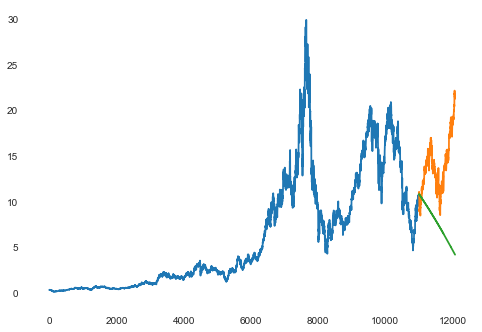

In [69]:
forcast_result = arima_model.predict(n_periods = 1075)
forcast_result = pd.DataFrame(forcast_result, index = validation.index, columns = ["Prediction"])


# Result
plt.plot(train["Close"])
plt.plot(validation["Close"])
plt.plot(forcast_result["Prediction"])

In [71]:
root_mean_squared_err_arima = np.sqrt(mean_squared_error(validation["Close"], forcast_result["Prediction"]))
root_mean_squared_err_arima

7.679912351354791

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

dataset = df_new.values

train_ = pd.DataFrame(dataset[0:11000, :], columns = list(df_new.columns))
valid_ = pd.DataFrame(dataset[11000:,:], columns = list(df_new.columns))

scaler = MinMaxScaler(feature_range = (0, 1))
scaled_df = scaler.fit_transform(dataset)

X_train_new, y_train_new = [], []

for i in range(60, len(train)):
    X_train_new.append(scaled_df[i-60:i, 0])
    y_train_new.append(scaled_df[i, 0])
    
#X_train_new, y_train_new = np.array(X_train_new), np.array(y_train_new)
X_train_new = np.reshape(X_train_new, (np.shape(X_train_new)[0], np.shape(X_train_new)[1], 1))


model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_new.shape[1],1)))
model_lstm.add(LSTM(units=50))
model_lstm.add(Dense(1))

model_lstm.compile(loss='mean_squared_error', optimizer='adam')
model_lstm.fit(X_train_new, X_train_new, epochs=1, batch_size=1, verbose=2)


UnknownError:  [_Derived_]  Fail to find the dnn implementation.
	 [[{{node CudnnRNN}}]]
	 [[sequential/lstm/StatefulPartitionedCall]] [Op:__inference_train_function_4662]

Function call stack:
train_function -> train_function -> train_function


In [163]:
inputs = df_new[len(df_new) - len(valid_) - 60:].values
#inputs = inputs.reshape(-1, 1)
inputs = scaler.transform(inputs)

X_test = []
for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i, 0])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (np.shape(X_test)[0], np.shape(X_test)[1], 1))
close_price = model_lstm.predict(X_test)
close_price_like = np.zeros(shape = (len(close_price), 14))
close_price_like[:, 0] = close_price[:,0]
close_price = scaler.inverse_transform(close_price_like)
close_price = pd.DataFrame(close_price)
root_mean_squared_lstm = mean_squared_error(valid_["Close"].values, close_price[0])

In [164]:
root_mean_squared_lstm

0.4637195721991204

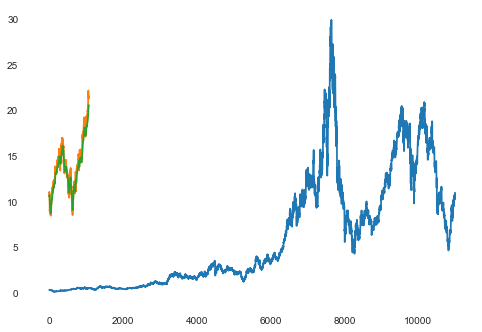

In [165]:
valid_['Predictions'] = close_price[0]
plt.plot(train_['Close'])
plt.plot(valid_[['Close','Predictions']])